In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

In [277]:
X = [3, 3, 2, 2, 6, 6, 7, 7, 8, 7]
Y = [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
dict = {"X" : X, "Y" : Y}

In [278]:
df = pd.DataFrame(dict)

In [279]:
df

,X,Y
0,3,5
1,3,4
2,2,8
3,2,3
4,6,2
5,6,4
6,7,3
7,7,4
8,8,5
9,7,6


In [280]:
K = 2
centroid = {
    1:[4,6],
    2:[5,4]
    
}

In [281]:
centroid

{1: [4, 6], 2: [5, 4]}

In [282]:
def centroiddistance(df, centroids, dist_cals_type):
    distance = 0
    if( dist_cals_type == "Manhattan"):
        for i in centroids.keys():
            df['distance_from_{}'.format(i)] =(
                abs(df['X'] - centroids[i][0])
                + abs(df['Y'] - centroids[i][1])
            )
            
        
    else:
        for i in centroids.keys():
            df['distance_from_{}'.format(i)] = (
                np.sqrt(
                    (df['X'] - centroids[i][0]) ** 2
                    + (df['Y'] - centroids[i][1]) ** 2
                )
            )
        
    centroids_dist = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['NearbyCentroid'] = df.loc[:, centroids_dist].idxmin(axis=1)
    df['NearbyCentroid'] = df['NearbyCentroid'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['NearbyCentroid'].map(lambda x: colmap[x])
        
    return df

In [283]:
import copy
old_centroids = copy.deepcopy(centroid)

def centroidupdate(df_updated):
    ncentroid = {
    1:[0,0],
    2:[0,0]
    }
    for i in ncentroid.keys():
        print(df_updated[df_updated['NearbyCentroid'] == i])
        ncentroid[i][0] = np.mean(df_updated[df_updated['NearbyCentroid'] == i]['X'])
        ncentroid[i][1] = np.mean(df_updated[df_updated['NearbyCentroid'] == i]['Y'])
    return ncentroid
def centroidmatch(old, new):
    match = 0;
    for i in old.keys():
        if ((old[i][0] == new[i][0]) & (old[i][1] == new[i][1])):
            
            match = 1;
        else:
            match = 0;
    return match
def KmeansAlgorithm(centroid, df, dist_type): 
    fig = plt.figure(figsize=(5, 5))
    plt.scatter( df['X'], df['Y'], color='k')
    colmap = {1: 'r', 2: 'b'}
    for i in centroid.keys():
        plt.scatter(*centroid[i], color=colmap[i])
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()
    count = 0
    while True:
        
        #old_centroids = centroid
        print("old_centroids")
        print(centroid)
        df_updated = centroiddistance(df, centroid, dist_type)
        print(df_updated)
        fig = plt.figure(figsize=(5, 5))
        plt.scatter(df_updated['X'], df_updated['Y'], color=df_updated['color'], edgecolor = 'k' )
        for i in centroid.keys():
            plt.scatter(*centroid[i], color=colmap[i])
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.show()
        n_centroid[count] = centroidupdate(df_updated)
        print("new centroid" + str(count))
        print(n_centroid[count])
        fig = plt.figure(figsize=(5, 5))
        plt.scatter(df_updated['X'], df_updated['Y'], color=df_updated['color'], edgecolor = 'k' )
        for i in n_centroid[count].keys():
            plt.scatter(*n_centroid[count][i], color=colmap[i])
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.show() 
        match = centroidmatch(centroid, n_centroid[count])
        print("Match ")
        print(match)
        if (match == 1):
            break;
        else:
            centroid = n_centroid[count]
            count = count + 1;

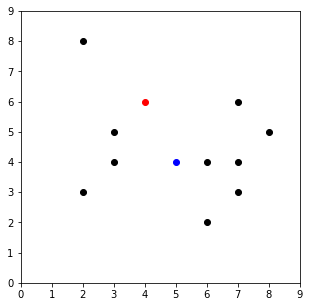

old_centroids
{1: [4, 6], 2: [5, 4]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5                2                3               1     r
1  3  4                3                2               2     b
2  2  8                4                7               1     r
3  2  3                5                4               2     b
4  6  2                6                3               2     b
5  6  4                4                1               2     b
6  7  3                6                3               2     b
7  7  4                5                2               2     b
8  8  5                5                4               2     b
9  7  6                3                4               1     r


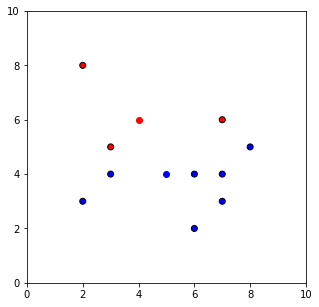

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5                2                3               1     r
2  2  8                4                7               1     r
9  7  6                3                4               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
1  3  4                3                2               2     b
3  2  3                5                4               2     b
4  6  2                6                3               2     b
5  6  4                4                1               2     b
6  7  3                6                3               2     b
7  7  4                5                2               2     b
8  8  5                5                4               2     b
new centroid0
{1: [4.0, 6.333333333333333], 2: [5.571428571428571, 3.5714285714285716]}


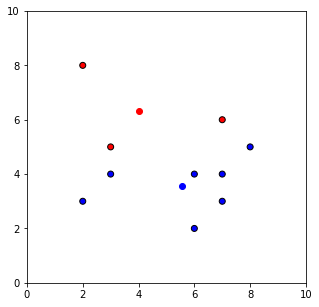

Match 
0
old_centroids
{1: [4.0, 6.333333333333333], 2: [5.571428571428571, 3.5714285714285716]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         2.333333         4.000000               1     r
1  3  4         3.333333         3.000000               2     b
2  2  8         3.666667         8.000000               1     r
3  2  3         5.333333         4.142857               2     b
4  6  2         6.333333         2.000000               2     b
5  6  4         4.333333         0.857143               2     b
6  7  3         6.333333         2.000000               2     b
7  7  4         5.333333         1.857143               2     b
8  8  5         5.333333         3.857143               2     b
9  7  6         3.333333         3.857143               1     r


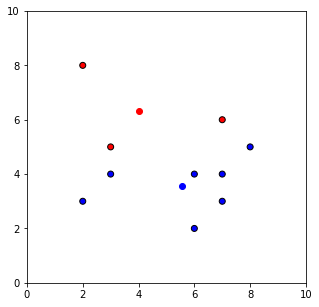

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         2.333333         4.000000               1     r
2  2  8         3.666667         8.000000               1     r
9  7  6         3.333333         3.857143               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
1  3  4         3.333333         3.000000               2     b
3  2  3         5.333333         4.142857               2     b
4  6  2         6.333333         2.000000               2     b
5  6  4         4.333333         0.857143               2     b
6  7  3         6.333333         2.000000               2     b
7  7  4         5.333333         1.857143               2     b
8  8  5         5.333333         3.857143               2     b
new centroid1
{1: [4.0, 6.333333333333333], 2: [5.571428571428571, 3.5714285714285716]}


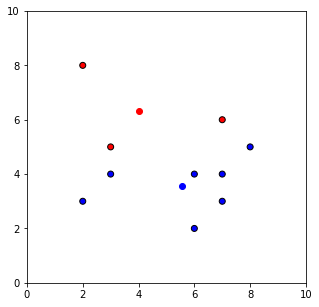

Match 
1


In [284]:
KmeansAlgorithm(centroid, df,'Manhattan')

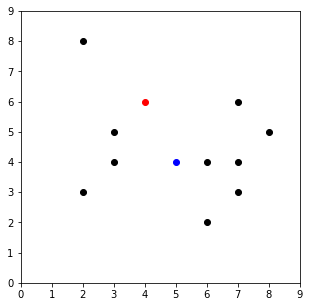

old_centroids
{1: [4, 6], 2: [5, 4]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         1.414214         2.236068               1     r
1  3  4         2.236068         2.000000               2     b
2  2  8         2.828427         5.000000               1     r
3  2  3         3.605551         3.162278               2     b
4  6  2         4.472136         2.236068               2     b
5  6  4         2.828427         1.000000               2     b
6  7  3         4.242641         2.236068               2     b
7  7  4         3.605551         2.000000               2     b
8  8  5         4.123106         3.162278               2     b
9  7  6         3.000000         2.828427               2     b


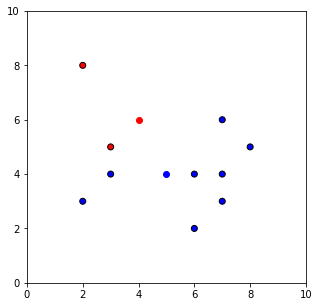

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         1.414214         2.236068               1     r
2  2  8         2.828427         5.000000               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
1  3  4         2.236068         2.000000               2     b
3  2  3         3.605551         3.162278               2     b
4  6  2         4.472136         2.236068               2     b
5  6  4         2.828427         1.000000               2     b
6  7  3         4.242641         2.236068               2     b
7  7  4         3.605551         2.000000               2     b
8  8  5         4.123106         3.162278               2     b
9  7  6         3.000000         2.828427               2     b
new centroid0
{1: [2.5, 6.5], 2: [5.75, 3.875]}


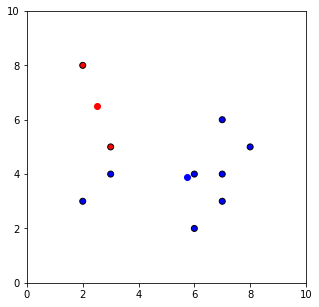

Match 
0
old_centroids
{1: [2.5, 6.5], 2: [5.75, 3.875]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         1.581139         2.971216               1     r
1  3  4         2.549510         2.752839               1     r
2  2  8         1.581139         5.574776               1     r
3  2  3         3.535534         3.850730               1     r
4  6  2         5.700877         1.891593               2     b
5  6  4         4.301163         0.279508               2     b
6  7  3         5.700877         1.525819               2     b
7  7  4         5.147815         1.256234               2     b
8  8  5         5.700877         2.515576               2     b
9  7  6         4.527693         2.465385               2     b


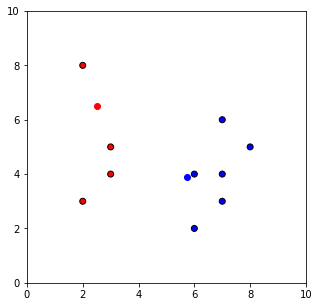

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         1.581139         2.971216               1     r
1  3  4         2.549510         2.752839               1     r
2  2  8         1.581139         5.574776               1     r
3  2  3         3.535534         3.850730               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
4  6  2         5.700877         1.891593               2     b
5  6  4         4.301163         0.279508               2     b
6  7  3         5.700877         1.525819               2     b
7  7  4         5.147815         1.256234               2     b
8  8  5         5.700877         2.515576               2     b
9  7  6         4.527693         2.465385               2     b
new centroid1
{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


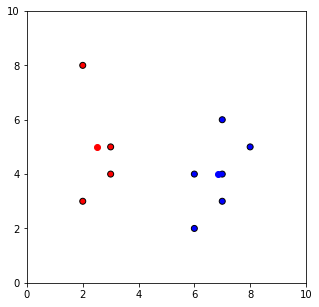

Match 
0
old_centroids
{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         0.500000         3.961621               1     r
1  3  4         1.118034         3.833333               1     r
2  2  8         3.041381         6.273843               1     r
3  2  3         2.061553         4.935698               1     r
4  6  2         4.609772         2.166667               2     b
5  6  4         3.640055         0.833333               2     b
6  7  3         4.924429         1.013794               2     b
7  7  4         4.609772         0.166667               2     b
8  8  5         5.500000         1.536591               2     b
9  7  6         4.609772         2.006932               2     b


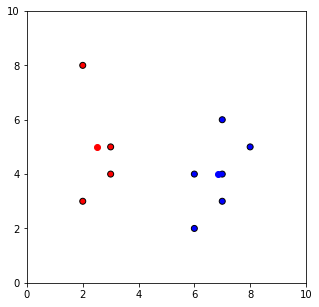

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         0.500000         3.961621               1     r
1  3  4         1.118034         3.833333               1     r
2  2  8         3.041381         6.273843               1     r
3  2  3         2.061553         4.935698               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
4  6  2         4.609772         2.166667               2     b
5  6  4         3.640055         0.833333               2     b
6  7  3         4.924429         1.013794               2     b
7  7  4         4.609772         0.166667               2     b
8  8  5         5.500000         1.536591               2     b
9  7  6         4.609772         2.006932               2     b
new centroid2
{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


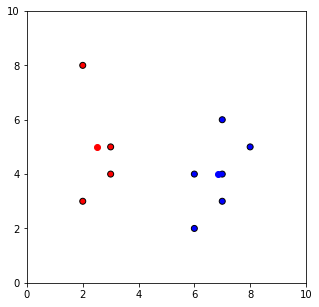

Match 
1


In [285]:
KmeansAlgorithm(centroid, df,'Euclidean')

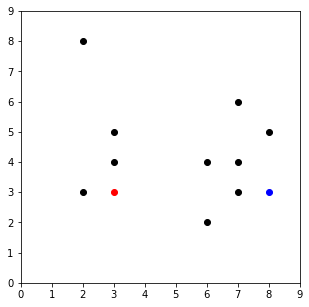

old_centroids
{1: [3, 3], 2: [8, 3]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5                2                7               1     r
1  3  4                1                6               1     r
2  2  8                6               11               1     r
3  2  3                1                6               1     r
4  6  2                4                3               2     b
5  6  4                4                3               2     b
6  7  3                4                1               2     b
7  7  4                5                2               2     b
8  8  5                7                2               2     b
9  7  6                7                4               2     b


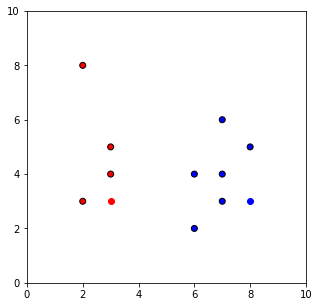

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5                2                7               1     r
1  3  4                1                6               1     r
2  2  8                6               11               1     r
3  2  3                1                6               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
4  6  2                4                3               2     b
5  6  4                4                3               2     b
6  7  3                4                1               2     b
7  7  4                5                2               2     b
8  8  5                7                2               2     b
9  7  6                7                4               2     b
new centroid0
{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


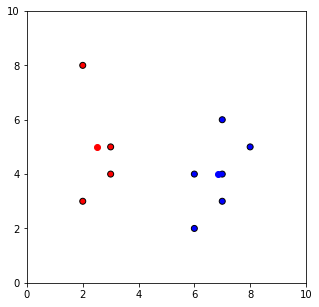

Match 
0
old_centroids
{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5              0.5         4.833333               1     r
1  3  4              1.5         3.833333               1     r
2  2  8              3.5         8.833333               1     r
3  2  3              2.5         5.833333               1     r
4  6  2              6.5         2.833333               2     b
5  6  4              4.5         0.833333               2     b
6  7  3              6.5         1.166667               2     b
7  7  4              5.5         0.166667               2     b
8  8  5              5.5         2.166667               2     b
9  7  6              5.5         2.166667               2     b


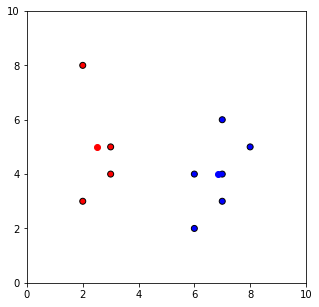

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5              0.5         4.833333               1     r
1  3  4              1.5         3.833333               1     r
2  2  8              3.5         8.833333               1     r
3  2  3              2.5         5.833333               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
4  6  2              6.5         2.833333               2     b
5  6  4              4.5         0.833333               2     b
6  7  3              6.5         1.166667               2     b
7  7  4              5.5         0.166667               2     b
8  8  5              5.5         2.166667               2     b
9  7  6              5.5         2.166667               2     b
new centroid1
{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


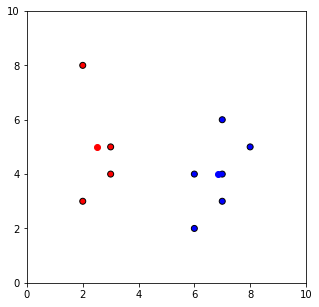

Match 
1


In [286]:
centroid3 = {
    1:[3,3],
    2:[8,3]
    }
KmeansAlgorithm(centroid3, df,'Manhattan')

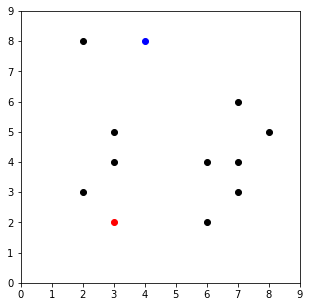

old_centroids
{1: [3, 2], 2: [4, 8]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5                3                4               1     r
1  3  4                2                5               1     r
2  2  8                7                2               2     b
3  2  3                2                7               1     r
4  6  2                3                8               1     r
5  6  4                5                6               1     r
6  7  3                5                8               1     r
7  7  4                6                7               1     r
8  8  5                8                7               2     b
9  7  6                8                5               2     b


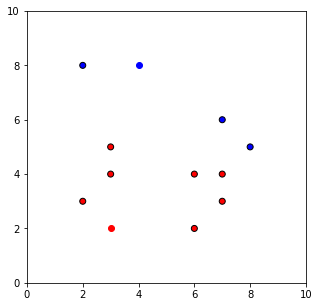

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5                3                4               1     r
1  3  4                2                5               1     r
3  2  3                2                7               1     r
4  6  2                3                8               1     r
5  6  4                5                6               1     r
6  7  3                5                8               1     r
7  7  4                6                7               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
2  2  8                7                2               2     b
8  8  5                8                7               2     b
9  7  6                8                5               2     b
new centroid0
{1: [4.857142857142857, 3.5714285714285716], 2: [5.666666666666667, 6.333333333333333]}


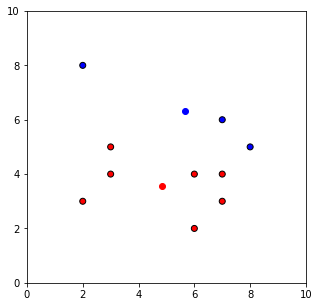

Match 
0
old_centroids
{1: [4.857142857142857, 3.5714285714285716], 2: [5.666666666666667, 6.333333333333333]}
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         3.285714         4.000000               1     r
1  3  4         2.285714         5.000000               1     r
2  2  8         7.285714         5.333333               2     b
3  2  3         3.428571         7.000000               1     r
4  6  2         2.714286         4.666667               1     r
5  6  4         1.571429         2.666667               1     r
6  7  3         2.714286         4.666667               1     r
7  7  4         2.571429         3.666667               1     r
8  8  5         4.571429         3.666667               2     b
9  7  6         4.571429         1.666667               2     b


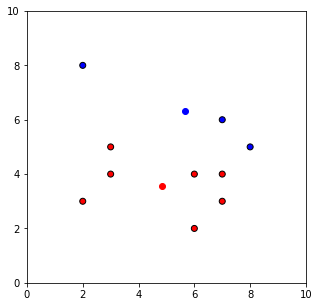

   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
0  3  5         3.285714         4.000000               1     r
1  3  4         2.285714         5.000000               1     r
3  2  3         3.428571         7.000000               1     r
4  6  2         2.714286         4.666667               1     r
5  6  4         1.571429         2.666667               1     r
6  7  3         2.714286         4.666667               1     r
7  7  4         2.571429         3.666667               1     r
   X  Y  distance_from_1  distance_from_2  NearbyCentroid color
2  2  8         7.285714         5.333333               2     b
8  8  5         4.571429         3.666667               2     b
9  7  6         4.571429         1.666667               2     b
new centroid1
{1: [4.857142857142857, 3.5714285714285716], 2: [5.666666666666667, 6.333333333333333]}


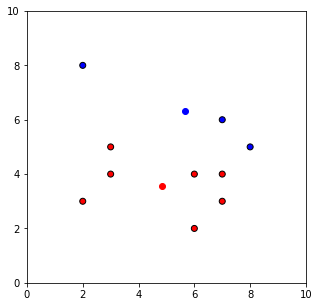

Match 
1


In [287]:
centroid3 = {
    1:[3,2],
    2:[4,8]
    }
KmeansAlgorithm(centroid3, df,'Manhattan')

In [288]:
x = np.array([[3,5],[3,4],[2,8],[2,3],[6,2],[6,4],[7,3],[7,4],[8,5],[7,6]])

[[2.5        5.        ]
 [6.83333333 4.        ]]
[0 0 0 0 1 1 1 1 1 1]


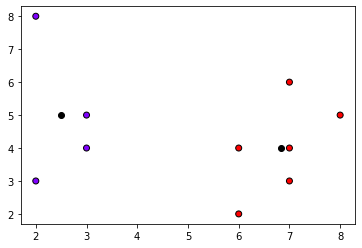

In [289]:
kmeans = KMeans(init="random",n_clusters =2 ,n_init=10,max_iter=300,random_state=42)
kmeans.fit(x)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(x[:,0], x[:,1], c = kmeans.labels_, cmap = 'rainbow', edgecolor = 'k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

In [290]:
x = [4.6, 4.7, 4.9, 5.0, 5.9, 6.0, 6.2, 6.7]
y = [2.9, 3.2, 3.1, 3.0, 3.2, 3.0, 2.8, 3.1]
clustergroup = [0,0,0,0,1,1,1,1]
color = ["r","r","r","r","b","b","b","b"]
dictn = {"x" : x, "y" : y, "label": clustergroup, "color":color}
dftask3 = pd.DataFrame(dictn)

In [291]:
dftask3

,x,y,label,color
0,4.6,2.9,0,r
1,4.7,3.2,0,r
2,4.9,3.1,0,r
3,5.0,3.0,0,r
4,5.9,3.2,1,b
5,6.0,3.0,1,b
6,6.2,2.8,1,b
7,6.7,3.1,1,b


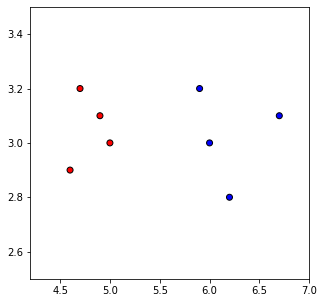

In [292]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(dftask3['x'], dftask3['y'], color=dftask3['color'], edgecolor = 'k' )
plt.xlim(4.2, 7)
plt.ylim(2.5, 3.5)
plt.show() 

In [293]:
datapoints = np.array([(4.7,3.2),(4.6,2.9),(4.9,3.1),(5.0,3.0),(5.9,3.2),(6.0,3.0),(6.2,2.8),(6.7,3.1)])

In [294]:
dist = np.sqrt((dftask3['x'][0] - dftask3['x'][1]) ** 2
                    + (dftask3['y'][0] - dftask3['y'][1]) ** 2
                )

In [295]:
dist

0.3162277660168384

In [296]:
mindistance = 10;
maxdistance = 0;
min_points = [];
max_points = [];
avgdistance = 0;
totalpair = 0;
for i in range(0, len(datapoints)):
    for j in range(i+1, len(datapoints)):
        dist = np.sqrt((dftask3['x'][i] - dftask3['x'][j]) ** 2
                    + (dftask3['y'][i] - dftask3['y'][j]) ** 2
                )
        avgdistance = avgdistance + dist
        totalpair = totalpair + 1
        if(mindistance > dist):
            mindistance = dist
            min_points = np.array([(dftask3['x'][i],dftask3['y'][i]),(dftask3['x'][j],dftask3['y'][j])])
        if(maxdistance < dist):
            maxdistance = dist
            max_points = np.array([(dftask3['x'][i],dftask3['y'][i]),(dftask3['x'][j],dftask3['y'][j])])
        print("points:")
        print((dftask3['x'][i],dftask3['y'][i]))
        print((dftask3['x'][j],dftask3['y'][j]))
        print("Distance = "+ str(dist))
print("Minimum:")
print(min_points)
print("Distance = "+ str(mindistance))
print("maximum:")
print(max_points)
print("Distance = "+ str(maxdistance))
print("average distance between all pairs : " + str(avgdistance/totalpair))

points:
(4.6, 2.9)
(4.7, 3.2)
Distance = 0.3162277660168384
points:
(4.6, 2.9)
(4.9, 3.1)
Distance = 0.3605551275463996
points:
(4.6, 2.9)
(5.0, 3.0)
Distance = 0.4123105625617664
points:
(4.6, 2.9)
(5.9, 3.2)
Distance = 1.3341664064126342
points:
(4.6, 2.9)
(6.0, 3.0)
Distance = 1.4035668847618203
points:
(4.6, 2.9)
(6.2, 2.8)
Distance = 1.6031219541881403
points:
(4.6, 2.9)
(6.7, 3.1)
Distance = 2.109502310972899
points:
(4.7, 3.2)
(4.9, 3.1)
Distance = 0.22360679774997916
points:
(4.7, 3.2)
(5.0, 3.0)
Distance = 0.3605551275463989
points:
(4.7, 3.2)
(5.9, 3.2)
Distance = 1.2000000000000002
points:
(4.7, 3.2)
(6.0, 3.0)
Distance = 1.3152946437965904
points:
(4.7, 3.2)
(6.2, 2.8)
Distance = 1.5524174696260025
points:
(4.7, 3.2)
(6.7, 3.1)
Distance = 2.0024984394500787
points:
(4.9, 3.1)
(5.0, 3.0)
Distance = 0.1414213562373093
points:
(4.9, 3.1)
(5.9, 3.2)
Distance = 1.004987562112089
points:
(4.9, 3.1)
(6.0, 3.0)
Distance = 1.1045361017187258
points:
(4.9, 3.1)
(6.2, 2.8)
Distance = 

In [297]:
len(dftask3[dftask3['label'] == 1])

4

In [298]:
for k in range(0,2):
    dftask3temp = dftask3[dftask3['label'] == k]
    averagedist = 0
    for i in range(0, len(dftask3temp)):
        for j in range(i+1, len(dftask3temp)):
            dist = np.sqrt((dftask3['x'][i] - dftask3['x'][j]) ** 2
                    + (dftask3['y'][i] - dftask3['y'][j]) ** 2
                    )
        